# Задача
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:
научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
проанализировать основные признаки, наиболее сильно влияющие на отток;
сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
1) выделить целевые группы клиентов;
2) предложить меры по снижению оттока;
3) определить другие особенности взаимодействия с клиентами.

-----------------------------------------------------

«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:
- 'Churn' — факт оттока в текущем месяце;
- Текущие поля в датасете:
  - Данные клиента за предыдущий до проверки факта оттока месяц:
  - 'gender' — пол;
  - 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
  - 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
  - 'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
  - 'Phone' — наличие контактного телефона;
  - 'Age' — возраст;
  - 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
- Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
  - 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
  - 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
  - 'Group_visits' — факт посещения групповых занятий;
  - 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
  - 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
  - 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

-----------------------------------------------------

## Шаг 1. Загрузите данные

In [7]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,silhouette_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import  dendrogram, linkage 
import itertools
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [8]:

def first_look (df):
    '''Функция получения первичной информации о датафрейме'''
    print('\033[1m' + 'Первые 5 строк' + '\033[0m')
    display(df.head())
    print('')
    print('')
    print('\033[1m' + 'Типы данных' + '\033[0m')
    print (df.info())
    print('')
    print('')
    print('\033[1m' + 'Пропуски' + '\033[0m')
    count = 0
    for element in df.columns:
        if df[element].isna().sum() > 0:
            print(element, ' - ', df[element].isna().sum(), 'пропусков')
            count = +1
        if count == 0:
            print('Колонка', element,'пропусков не имеет')
    print('')
    print('')
    print('\033[1m' + 'Дубликаты' + '\033[0m')
    print(df.duplicated().sum(), 'дубликатов')

In [9]:
df = pd.read_csv('gym_churn.csv')

In [10]:
first_look(df)

Первые 5 строк


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0




Типы данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 no

Все кроме наименований столбцов мне нравится

In [11]:
df.columns = df.columns.str.lower()

**Вывод:** вроде, все красиво

## Шаг 2. Проведите исследовательский анализ данных (EDA)

Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


- в среднем клинты посещают зал 1.8 раз в неделю 
- половина клиентво ходят в фитнес центр 3 месяца
- в среднем клиентам 29 лет
- у большинства клиентов абонимент на 1 месяц 

Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());

In [14]:
df.groupby('churn').mean().T\
    .assign(difference = lambda x: ((x[0] / x[1]) - 1) * 100)

churn,0,1,difference
gender,0.510037,0.510839,-0.156880
near_location,0.873086,0.768143,13.661882
partner,0.534195,0.355325,50.339846
promo_friends,0.353522,0.183789,92.352012
phone,0.903709,0.902922,0.087158
contract_period,5.747193,1.728558,232.484825
group_visits,0.464103,0.268615,72.776753
age,29.976523,26.989632,11.066806
avg_additional_charges_total,158.445715,115.082899,37.679635
month_to_end_contract,5.283089,1.662582,217.764056


Из среднего значения видно, что больше выделяются следущие признаки:
   - лайфтайм 375.6%, большинство людей уходят после первого месяца
   - абонимент у тех кто ушел в основновном на 1 месяц, а у тех кто не уходит на 6 месяцев
   - ушедшие, перед уходом реже ходят в зал
   - ушедшие клиенты на 72% реже бывали на групповых тренировках

Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);

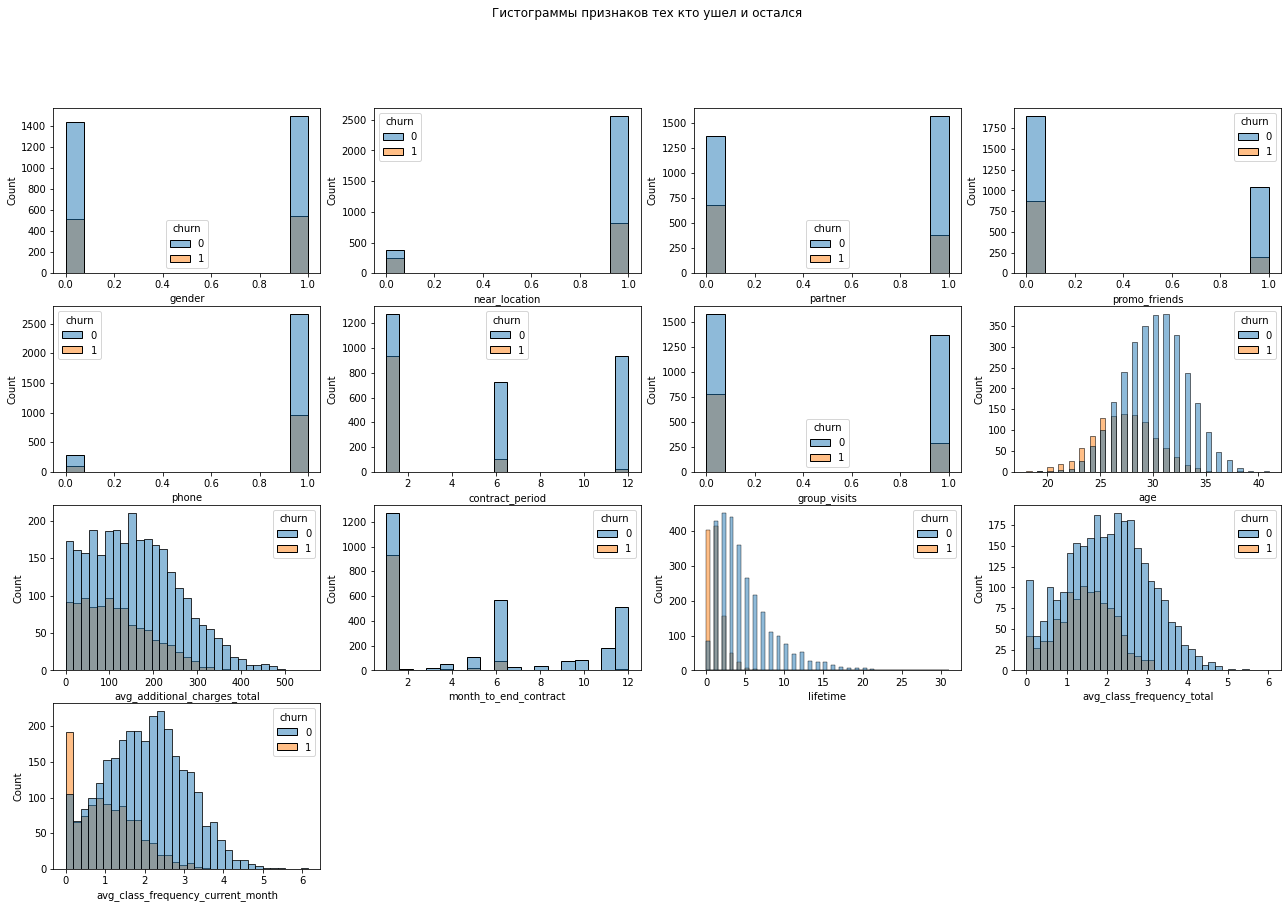

In [8]:
fig, axes = plt.subplots(4, 4, figsize=(22, 14)) 
fig.suptitle('Гистограммы признаков тех кто ушел и остался')

for i, v in enumerate(df.columns[:-1]):
   
    sns.histplot(ax = axes[i // 4, i % 4], data=df, x=v, hue='churn')
    
fig.delaxes(axes[3, 1]) #не смог придумать как нижний растянуть
fig.delaxes(axes[3, 2])
fig.delaxes(axes[3, 3])
plt.show()

График распределения подтверждает то что было видно в средних значениях, лайфтайм намного меньше у ушедших. По возрасту, видно что ушедшие смещены влево

Постройте матрицу корреляций и отобразите её.

In [9]:
corr_matrix = df.corr()

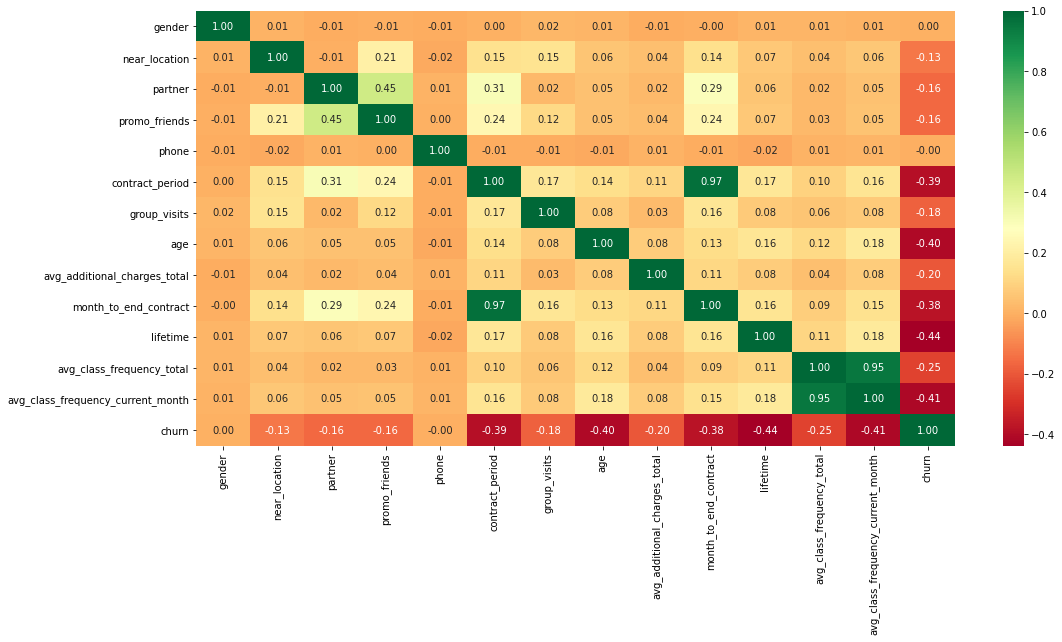

In [10]:
plt.figure(figsize=(17,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn');


У ухода самые сильные кореляции с временными метриками и возрастом

## Шаг 3. Постройте модель прогнозирования оттока клиентов

In [15]:
X = df.drop('churn', axis = 1)
y = df['churn']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,  stratify = y )

Создаю модели

In [18]:
rand_for_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
logistic_regression_model = LogisticRegression(solver='liblinear', random_state = 0)

In [19]:
# в последнее время у меня привычка всегда делать функции
def predict(model):
    model.fit(X_train, y_train)
    # прогноз
    probabilities = model.predict_proba(X_test)[:, 1]
    # бинарный прогноз
    predictions = model.predict(X_test)
    print(f'''
            accuracy: {accuracy_score(y_test, predictions):.2f} 
            precision: {precision_score(y_test, predictions):.2f}
            recall: {recall_score(y_test, predictions):.2f}
            F1: {f1_score(y_test, predictions):.2f}
            ROC_AUC: {roc_auc_score(y_test, probabilities):.2f}
        ''')

Посмотрим на метрики логистической регрессии 

In [20]:
predict(rand_for_model)


            accuracy: 0.92 
            precision: 0.88
            recall: 0.83
            F1: 0.85
            ROC_AUC: 0.97
        


Посмотрим на метрики рандомного леса 

In [21]:
predict(logistic_regression_model)


            accuracy: 0.93 
            precision: 0.89
            recall: 0.83
            F1: 0.86
            ROC_AUC: 0.98
        


- Accuracy: точность прогнозирования 
- Precision: доля правильных ответов в пределах класса 
- Recall: количесто исстино положительных результатов 
- F1: обобщеная оценка метрик Precision и Recall 
- ROC_AUC:  показатель говорит о том, что модель очень точно производит бинарную классификацию объектов

**Вывод:** результаты получились очень близкими, у логистической регресси метрики чуть получше

## Шаг 4. Сделайте кластеризацию клиентов

In [22]:
sc = StandardScaler()
X_sc = sc.fit_transform(df.drop('churn', axis=1))

linked = linkage(X_sc, method = 'ward') 


Не знаю почему, но мне не нравится такой способ выбора кластеров.

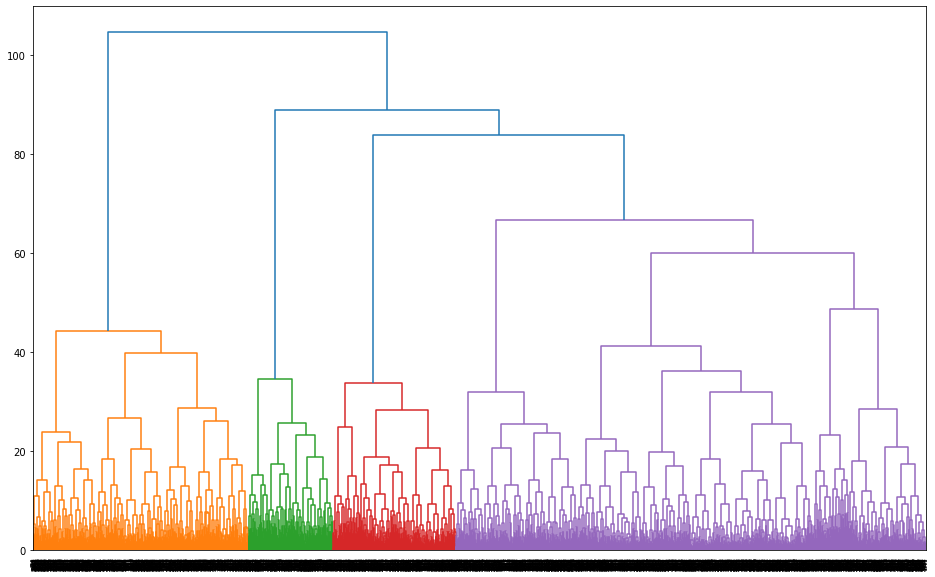

In [23]:
plt.figure(figsize=(16, 10))  
dendrogram(linked, orientation='top')
plt.show() 

Я бы выбрал 6 кластеров

Своровал функцию чтобы узнать посмотреть на локоть, а его тут нет
 

In [19]:
def elbow(X):
    from scipy.spatial.distance import cdist
    import numpy as np
    distortions = []
    inertias = []
    mapping1 = {}
    mapping2 = {}
    K = range(1, 12)
    
    for k in K:
        # Building and fitting the model
        kmeanModel = KMeans(n_clusters=k).fit(X)
        kmeanModel.fit(X)
    
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                            'euclidean'), axis=1)) / X.shape[0])
        inertias.append(kmeanModel.inertia_)
    
        mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                    'euclidean'), axis=1)) / X.shape[0]
        mapping2[k] = kmeanModel.inertia_
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method using Distortion')
    plt.show()

Выраженного локтя тут нет

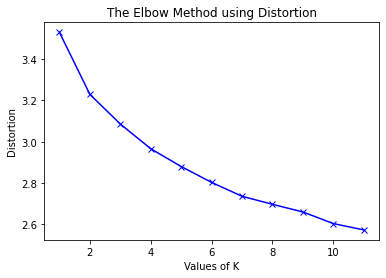

In [20]:
elbow(X_sc)

In [24]:
# я только сейчас заметил, что нам дано  в задании 5 кластеров
km = KMeans(n_clusters = 5, random_state=0)
# сохраним метки кластера в поле нашего датасета
df['cluster'] = km.fit_predict(X_sc)


Среднии значения для кластеров

In [22]:
df.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
near_location,0.959406,0.862338,0.000000,1.000000,0.976134
partner,0.783168,0.470130,0.463366,0.350238,0.356802
promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
phone,1.000000,0.000000,1.000000,1.000000,0.998807
contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
age,29.982178,29.301299,28.477228,28.167987,30.125298
avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


**Вывод:** видно что доля оттока у 0 и 4 кластера намного меньше остальных, их отличает высокий лайфтайм 

У 0 го и 4 го кластера самый маленький отток, их лайфтайм довольно большой а возраст в среднем немного больше чем у других

Text(0.5, 0.98, 'Гистограммы признаков тех кто ушел и остался по кластерам')

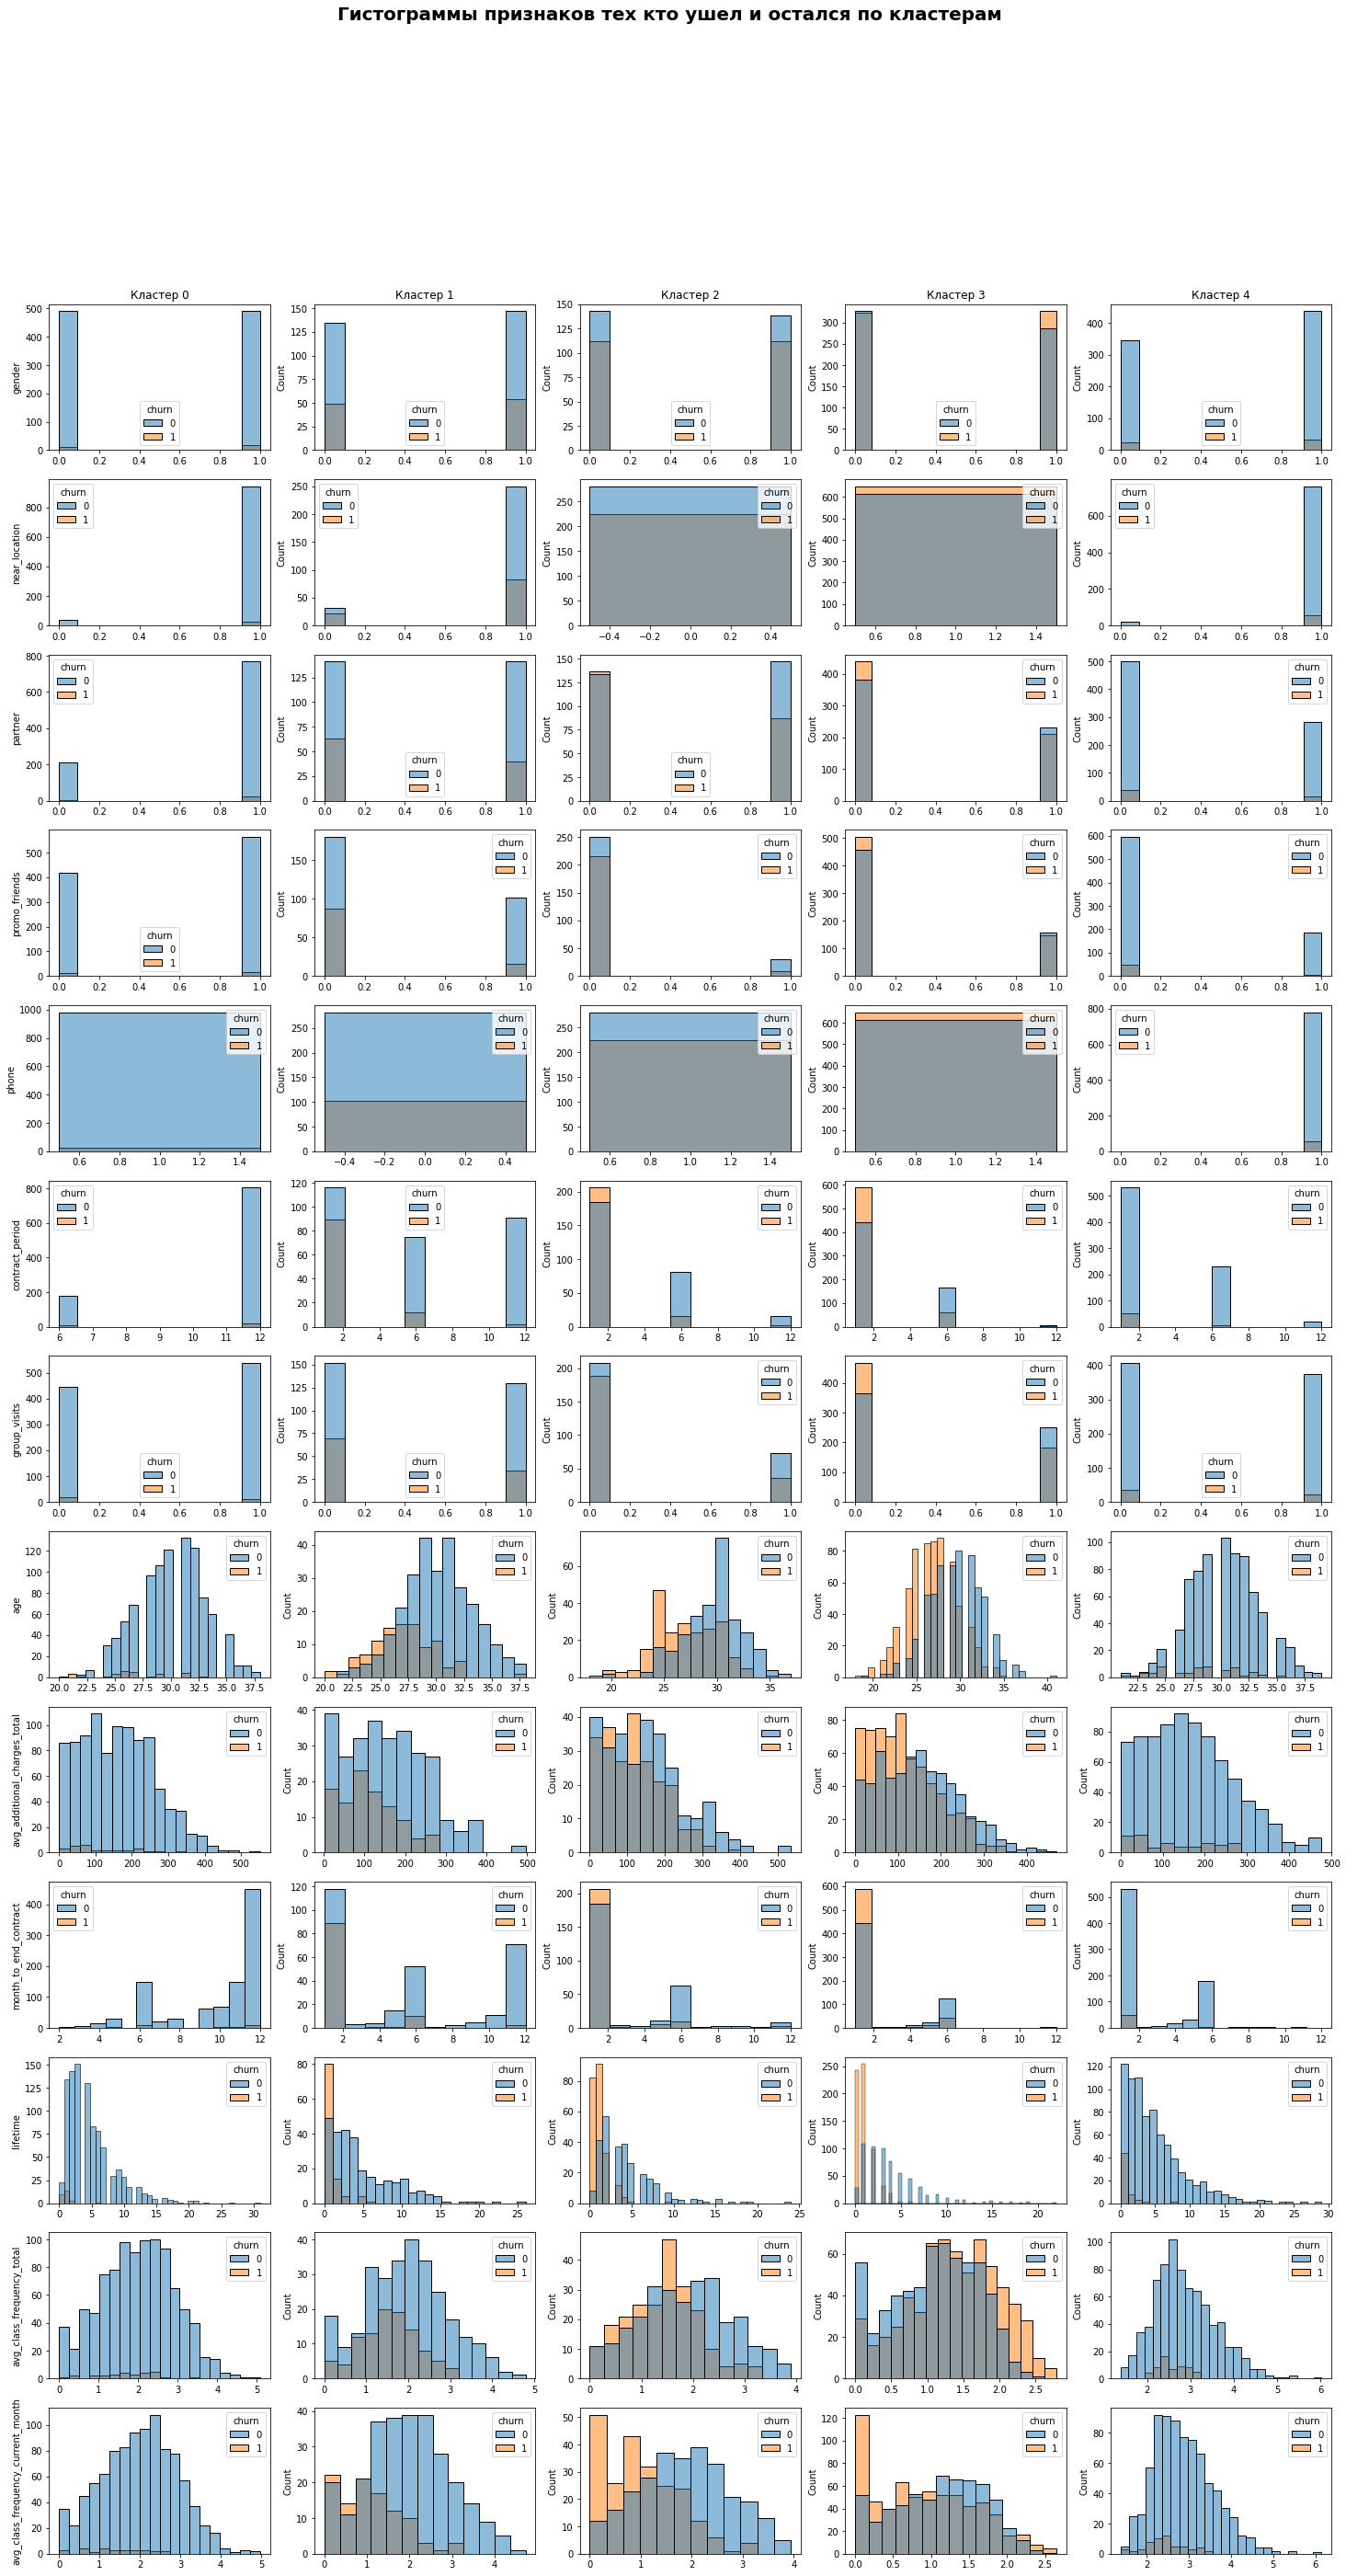

In [24]:
fig, axes = plt.subplots(13, 5, figsize=(25, 45)) 



for col in range(0, 5):
    for row, v in enumerate(df.columns[:-2]):
        if col == 0:
            sns.histplot(ax = axes[row, col], data=df.loc[df['cluster'] == col], x=v, hue='churn').set(ylabel=v, xlabel='')
        else:
            sns.histplot(ax = axes[row, col], data=df.loc[df['cluster'] == col], x=v, hue='churn').set(xlabel='')


cols = ['Кластер {}'.format(col) for col in range(0, 5)]
for ax, col in zip(axes[0], cols):
    ax.set_title(col)
rows = ['{}'.format(row) for row in df.columns[:-2]]




fig.suptitle('Гистограммы признаков тех кто ушел и остался по кластерам', fontsize=20, fontweight ='bold' )

Text(0.5, 0.98, 'Столбчатые диаграммы дискретных величин с разделением по кластерам')

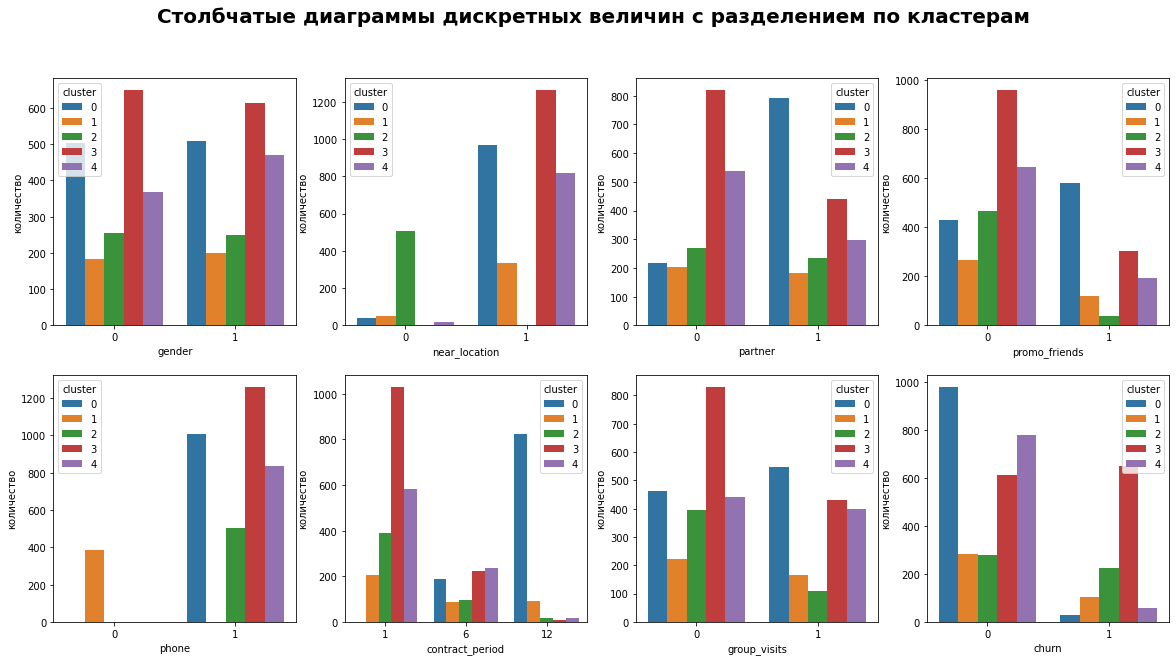

In [39]:
discr_values = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'churn']
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, v in enumerate(discr_values):
   
    sns.countplot(ax = axes[i // 4, i % 4], data=df, x=v, hue='cluster').set(ylabel= 'количество', xlabel=v)
fig.suptitle('Столбчатые диаграммы дискретных величин с разделением по кластерам', fontsize=20, fontweight ='bold' )

Text(0.5, 0.98, 'Боксплоты непрерывных величин с разделением по кластерам')

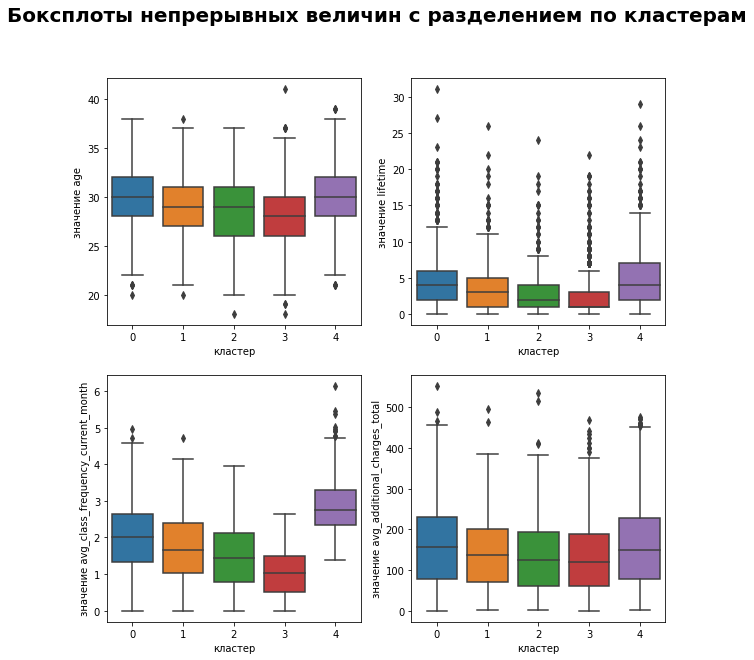

In [37]:
cont_values = ['age', 'lifetime', 'avg_class_frequency_current_month', 'avg_additional_charges_total']
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, v in enumerate(cont_values):
    
    sns.boxplot(ax = axes[i // 2, i % 2], data=df, y=v, x='cluster').set(ylabel= 'значение '+v, xlabel='кластер')

    
fig.suptitle('Боксплоты непрерывных величин с разделением по кластерам', fontsize=20, fontweight ='bold' )


In [25]:
df.contract_period.unique()

array([ 6, 12,  1])

**Вывод:** у нулевого и четвертого отток не очень большой,  у перового средний а у второго и третьего довольно большой. Также, видно что кластреры распределились не очень равномерно первый и второй очень маленькие по сравнению с остальными

Небольшие итоги по кластерам

Средний профиль клиента

**Кластер 0**
- проживают или работаю около фитнес центра
- партнер клуба
- большинство пришли по акции приведи друга
- 12 мес абонимент
- скорее всего посещал груповые занятия
- ходит в клуб 4-5 мес
- ходит на тренировки 2 раза в неделю 

**Кластер 1**
- проживают или работаю около фитнес центра
- возможно  партнер клуба
- возможно пришел по акции приведи друга
- 6 мес абонимент
- возможно посещал груповые занятия
- ходит в клуб 4 мес
- ходит на тренировки 2 раза в неделю 
  
**Кластер 2**
- не проживают или работет около фитнес центра
- возможно партнер клуба
- не пришел по акции приведи друга
- 1 или 6 мес абонимент
- скорее всего не посещал груповые занятия
- ходит в клуб 3 мес
- ходит на тренировки 1-2 раза в неделю 

**Кластер 3**
- проживают или работаю около фитнес центра
- скорее всего не партнер клуба
- скорее всего не пришел по акции приведи друга
- скорее всего 1 мес абонимент
- скорее всего не посещал груповые занятия
- ходит в клуб 2-3 мес
- ходит на тренировки 1 раза в неделю 

**Кластер 4**
- проживают или работаю около фитнес центра
- скорее всего не партнер клуба
- скорее всего не пришел по акции приведи друга
- скорее всего 1 мес абонимент
- скорее всего посещал груповые занятия
- ходит в клуб 5 мес
- ходит на тренировки 3 раза в неделю 


In [26]:
df.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
near_location,0.959406,0.862338,0.000000,1.000000,0.976134
partner,0.783168,0.470130,0.463366,0.350238,0.356802
promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
phone,1.000000,0.000000,1.000000,1.000000,0.998807
contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
age,29.982178,29.301299,28.477228,28.167987,30.125298
avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


## Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами

**Выводы:** 

В ходе исследования получены следующие результаты:

- больше всего на вероятность ухода влияет:
  -  лайфтайм, чем дольше пользователь ходит на тренировки тем ниже вероятность что он уйдет 
  -  время когда закончится абонимент, отток тех у кого остался 1 месяц намного выше остальных
  -  возраст, в среднем чем старше клиент тем ниже вероятность ухода
  -  количество занятий в неделю, чем больше тем ниже веротность что клиент уйдет
  -  период абонимента, большинство ушедших берут абонимент на 1 месяц 
  
- создана модель, построенная логистической регрессии, со следующими метриками:
  - accuracy: 0.93 
  - precision: 0.86
  - recall: 0.83
  - F1: 0.85
  - ROC_AUC: 0.97
Это хороший результат, её можно использовать в дальнейшем

- Рекомендации для стратегии взаимодействия с клиентами и их удержания:
  - давать больше рекламы надалеко от фитнес центра, доля оттока у тек кто живет или  работает  недалеко, намного меньше
  - делать больше партнерских программ и рассказывать о приглашении друзей
  - чаще проводить групповые занятия у  новичков
  - провести подробное исследование клиентов которые покупают абонимент на 1 месяц, по ним нужно больше данных, чтобы узнать причину оттока

